In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# **Step 1: Dataset Loading**

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

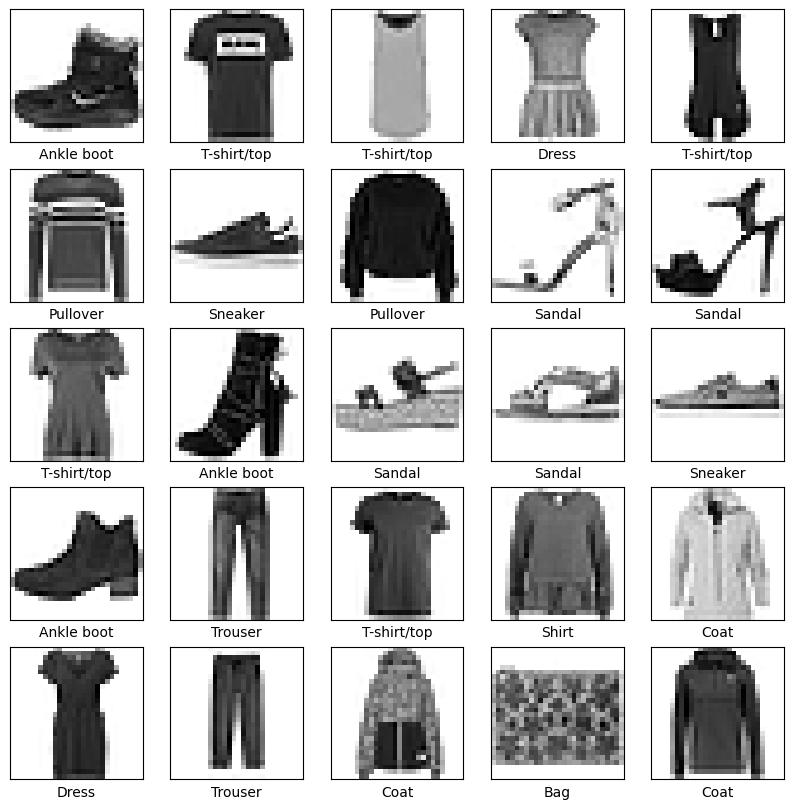

In [4]:
# Visualize sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Step 2: Data Preprocessing & Splitting**

In [5]:
# Normalize pixel values (0-255 -> 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Split training into train/validation
train_images, val_images = train_images[:50000], train_images[50000:]
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

# **Step 3: Model Building**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Converts 28x28 image to 784-D vector
    Dense(128, activation='relu'),   # Hidden layer
    Dense(10, activation='softmax') # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Step 4: Training with Epochs & Batch Size**

In [11]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(val_images, val_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7558 - loss: 0.7071 - val_accuracy: 0.8421 - val_loss: 0.4415
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8579 - loss: 0.4054 - val_accuracy: 0.8481 - val_loss: 0.4114
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8692 - loss: 0.3607 - val_accuracy: 0.8715 - val_loss: 0.3670
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8797 - loss: 0.3296 - val_accuracy: 0.8689 - val_loss: 0.3742
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8860 - loss: 0.3083 - val_accuracy: 0.8753 - val_loss: 0.3545
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8893 - loss: 0.3005 - val_accuracy: 0.8828 - val_loss: 0.3285
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8978 - loss: 0.2860 - val_accuracy: 0.8808 - val_loss: 0.3361
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9004 - loss: 0.2707 - val_accuracy: 0.

# **Step 5: Visualization of Training Progress**

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

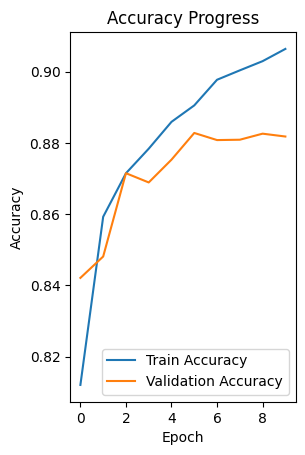

In [13]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

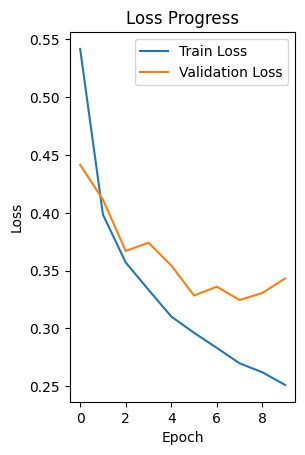

In [14]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# **Step 6: Test Evaluation & Prediction Visualization**

In [15]:
# Final test evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.3512

Test accuracy: 0.8753


In [16]:
# Predictions visualization
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


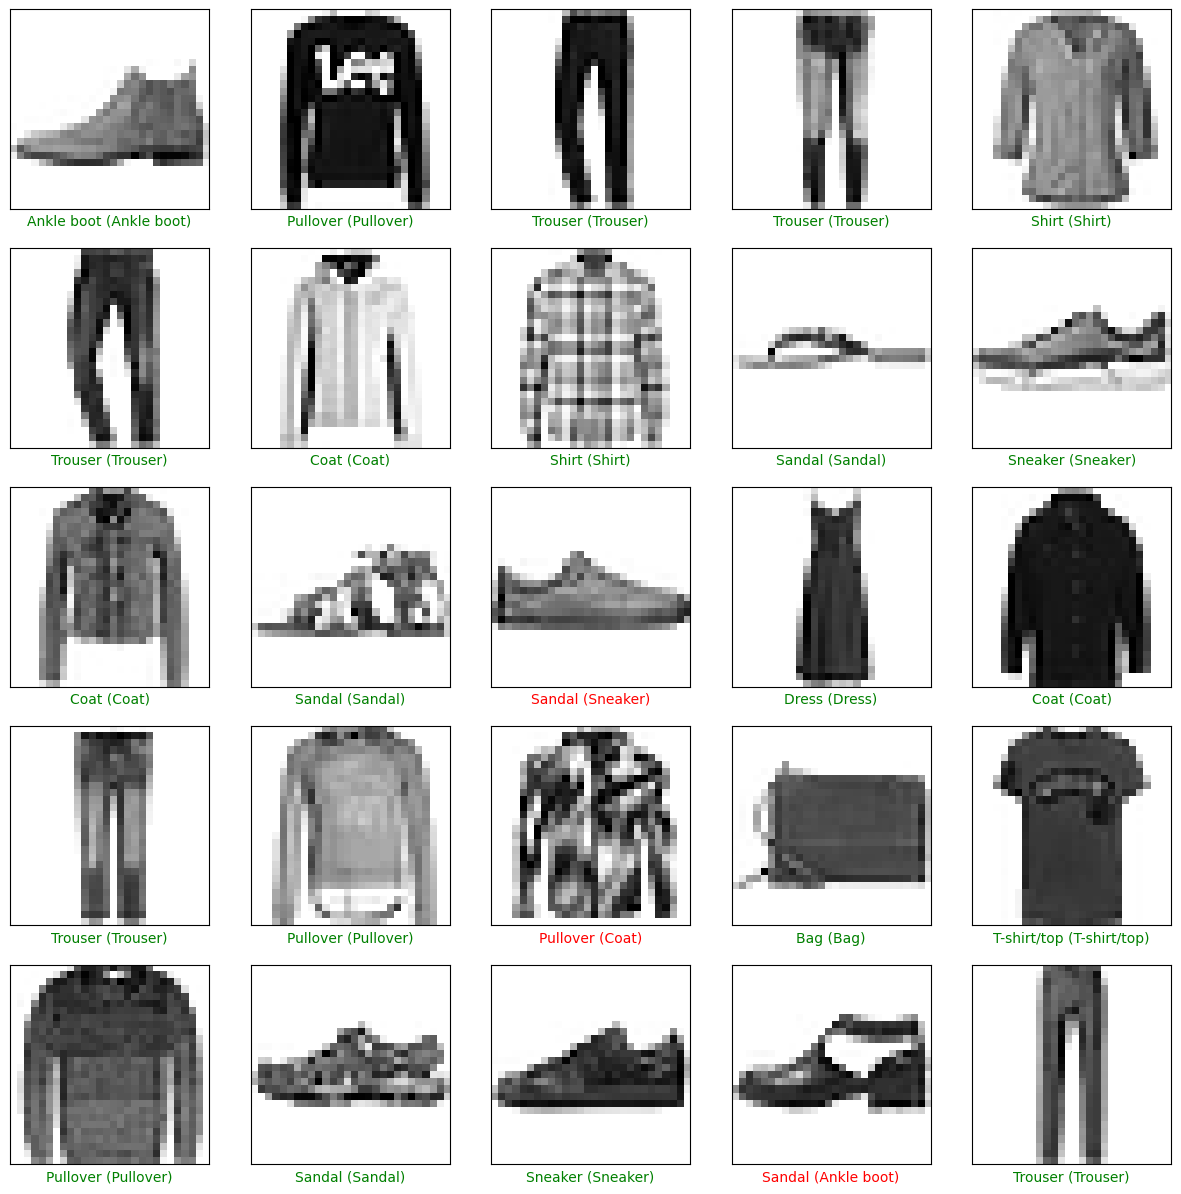

In [17]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()